In [3]:
#load the data
from tensorflow.keras.preprocessing.image import load_img,img_to_array

img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [4]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [5]:
#特征提取
features = model_vgg.predict(x)
print(features.shape)

1/1 [==============================] - 0s 355ms/step
(1, 7, 7, 512)


In [6]:
#flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


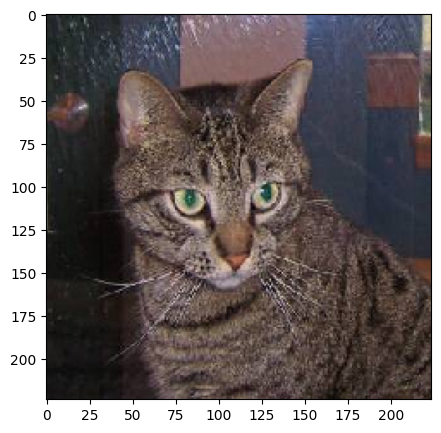

In [7]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [9]:
#load image and preprocess it with vgg16 structure
#--by flare
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i
    
folder = "dataset/data_vgg/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i
    
#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

1/1 [==============================] - 0s 289ms/step
preprocessed: dataset/data_vgg/cats//cat.1.jpg
1/1 [==============================] - 0s 184ms/step
preprocessed: dataset/data_vgg/cats//cat.10.jpg
1/1 [==============================] - 0s 184ms/step
preprocessed: dataset/data_vgg/cats//cat.100.jpg
1/1 [==============================] - 0s 183ms/step
preprocessed: dataset/data_vgg/cats//cat.101.jpg
1/1 [==============================] - 0s 172ms/step
preprocessed: dataset/data_vgg/cats//cat.102.jpg
1/1 [==============================] - 0s 186ms/step
preprocessed: dataset/data_vgg/cats//cat.103.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.104.jpg
1/1 [==============================] - 0s 186ms/step
preprocessed: dataset/data_vgg/cats//cat.105.jpg
1/1 [==============================] - 0s 185ms/step
preprocessed: dataset/data_vgg/cats//cat.106.jpg
1/1 [==============================] - 0s 179ms/step
preprocessed: dataset/data_vgg/c

1/1 [==============================] - 0s 185ms/step
preprocessed: dataset/data_vgg/cats//cat.171.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.172.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.173.jpg
1/1 [==============================] - 0s 169ms/step
preprocessed: dataset/data_vgg/cats//cat.174.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.175.jpg
1/1 [==============================] - 0s 180ms/step
preprocessed: dataset/data_vgg/cats//cat.176.jpg
1/1 [==============================] - 0s 197ms/step
preprocessed: dataset/data_vgg/cats//cat.177.jpg
1/1 [==============================] - 0s 184ms/step
preprocessed: dataset/data_vgg/cats//cat.178.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.179.jpg
1/1 [==============================] - 0s 188ms/step
preprocessed: dataset/data_vg

1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/cats//cat.243.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/cats//cat.244.jpg
1/1 [==============================] - 0s 180ms/step
preprocessed: dataset/data_vgg/cats//cat.245.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/cats//cat.246.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/cats//cat.247.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/cats//cat.248.jpg
1/1 [==============================] - 0s 178ms/step
preprocessed: dataset/data_vgg/cats//cat.249.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/cats//cat.25.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/cats//cat.250.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg

1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/cats//cat.46.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/cats//cat.47.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/cats//cat.48.jpg
1/1 [==============================] - 0s 168ms/step
preprocessed: dataset/data_vgg/cats//cat.49.jpg
1/1 [==============================] - 0s 170ms/step
preprocessed: dataset/data_vgg/cats//cat.5.jpg
1/1 [==============================] - 0s 170ms/step
preprocessed: dataset/data_vgg/cats//cat.50.jpg
1/1 [==============================] - 0s 169ms/step
preprocessed: dataset/data_vgg/cats//cat.51.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/cats//cat.52.jpg
1/1 [==============================] - 0s 181ms/step
preprocessed: dataset/data_vgg/cats//cat.53.jpg
1/1 [==============================] - 0s 177ms/step
preprocessed: dataset/data_vgg/cats//ca

1/1 [==============================] - 0s 172ms/step
preprocessed: dataset/data_vgg/dogs//dog.119.jpg
1/1 [==============================] - 0s 172ms/step
preprocessed: dataset/data_vgg/dogs//dog.12.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/dogs//dog.120.jpg
1/1 [==============================] - 0s 180ms/step
preprocessed: dataset/data_vgg/dogs//dog.121.jpg
1/1 [==============================] - 0s 181ms/step
preprocessed: dataset/data_vgg/dogs//dog.122.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/dogs//dog.123.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/dogs//dog.124.jpg
1/1 [==============================] - 0s 216ms/step
preprocessed: dataset/data_vgg/dogs//dog.125.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/dogs//dog.126.jpg
1/1 [==============================] - 0s 188ms/step
preprocessed: dataset/data_vgg

1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/dogs//dog.191.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.192.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/dogs//dog.193.jpg
1/1 [==============================] - 0s 167ms/step
preprocessed: dataset/data_vgg/dogs//dog.194.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/dogs//dog.195.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.196.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/dogs//dog.197.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.198.jpg
1/1 [==============================] - 0s 177ms/step
preprocessed: dataset/data_vgg/dogs//dog.199.jpg
1/1 [==============================] - 0s 182ms/step
preprocessed: dataset/data_vg

1/1 [==============================] - 0s 179ms/step
preprocessed: dataset/data_vgg/dogs//dog.263.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/dogs//dog.264.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset/data_vgg/dogs//dog.265.jpg
1/1 [==============================] - 0s 172ms/step
preprocessed: dataset/data_vgg/dogs//dog.266.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.267.jpg
1/1 [==============================] - 0s 183ms/step
preprocessed: dataset/data_vgg/dogs//dog.268.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/dogs//dog.269.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset/data_vgg/dogs//dog.27.jpg
1/1 [==============================] - 0s 181ms/step
preprocessed: dataset/data_vgg/dogs//dog.270.jpg
1/1 [==============================] - 0s 180ms/step
preprocessed: dataset/data_vgg

1/1 [==============================] - 0s 180ms/step
preprocessed: dataset/data_vgg/dogs//dog.66.jpg
1/1 [==============================] - 0s 169ms/step
preprocessed: dataset/data_vgg/dogs//dog.67.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.68.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/dogs//dog.69.jpg
1/1 [==============================] - 0s 172ms/step
preprocessed: dataset/data_vgg/dogs//dog.7.jpg
1/1 [==============================] - 0s 176ms/step
preprocessed: dataset/data_vgg/dogs//dog.70.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.71.jpg
1/1 [==============================] - 0s 171ms/step
preprocessed: dataset/data_vgg/dogs//dog.72.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset/data_vgg/dogs//dog.73.jpg
1/1 [==============================] - 0s 183ms/step
preprocessed: dataset/data_vgg/dogs//do

In [10]:
#split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [11]:
#set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250890    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 7ms/step - loss: 1.7194 - accuracy: 0.8048
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.1541 - accuracy: 0.9643
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9810
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9810
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9833
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9810
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0270 - accuracy: 0.9833
Epoch 8/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.9833
Epoch 9/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9833
Epoch 10/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0297 - accuracy: 0.9833
Epoch 11/50
14/14 [

In [14]:
from sklearn.metrics import accuracy_score
y_train_predict = (model.predict(X_train)>0.5).astype("int32")
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

14/14 [==============================] - 0s 2ms/step
0.9547619047619048


In [15]:
#测试准确率
y_test_predict = (model.predict(X_test)>0.5).astype('int32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

6/6 [==============================] - 0s 3ms/step
0.95


In [16]:
img_path = 'cat1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = (model.predict(features)>0.5).astype('int32')
print(result)

1/1 [==============================] - 0s 22ms/step
[[0]]


1/1 [==============================] - 0s 24ms/step


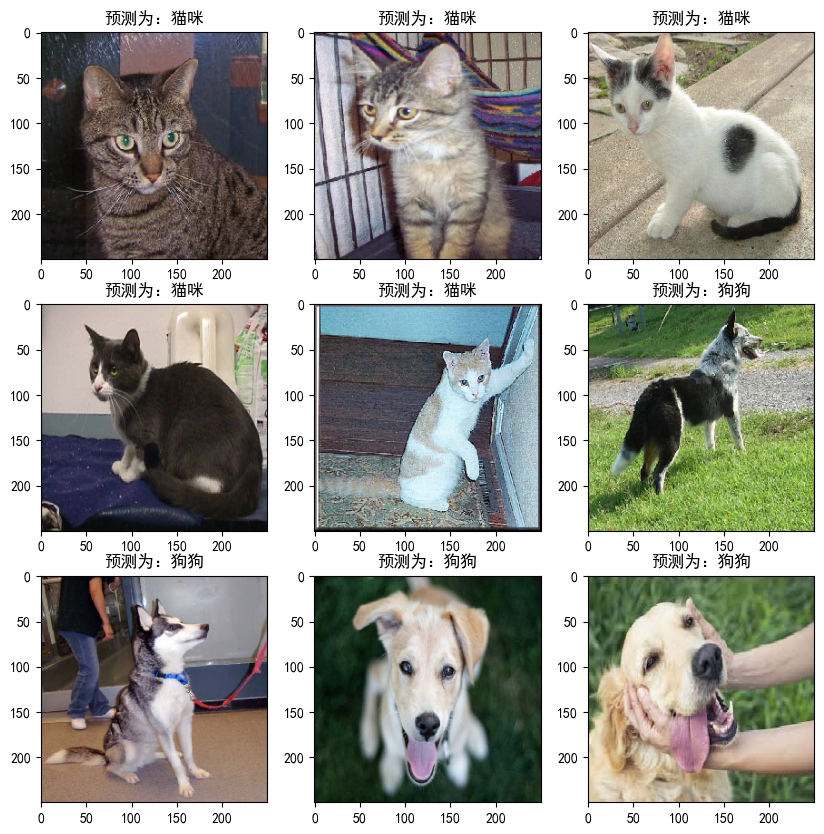

In [17]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
#from cv2 import load_img
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    result = (model.predict(x_vgg)>0.5).astype('int32')
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()